In [1]:
#installing required functions
!pip install ts2vg
!pip install igraph
!pip install pycairo
!pip install cairocffi

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.1 MB 19.3 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 3.3 MB 26.5 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 344 kB 26.0 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
  ERROR: Failed building wheel for pycairo
Failed to build pycairo
ERROR: Could not build wheels for pycairo which use PEP 517 and cannot be installed directly
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 69 kB 6.7 MB/s 
  Created wheel for cairocffi: filename=cairo

In [2]:
#Importing the necessary packages
from ts2vg import NaturalVG
from ts2vg import HorizontalVG
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
#Mounting files from google drive
from google.colab import drive
drive.mount('/content/drive/')
%cd /content/drive/MyDrive/FDA_Project_2/Datasets_Head_Chest
#Changing directory for files and converting the file names to list
dir = '/content/drive/MyDrive/FDA_Project_2/Datasets_Head_Chest'
#It gives us the list of all the files present in the current directory
files_dir_list = sorted(os.listdir(dir))
print(pd.DataFrame(files_dir_list,columns=['File_Names']))

Mounted at /content/drive/
/content/drive/MyDrive/FDA_Project_2/Datasets_Head_Chest
                            File_Names
0    Sub_10_acc_climbingdown_chest.csv
1     Sub_10_acc_climbingdown_head.csv
2      Sub_10_acc_climbingup_chest.csv
3       Sub_10_acc_climbingup_head.csv
4         Sub_10_acc_running_chest.csv
..                                 ...
115      Sub_9_acc_climbingup_head.csv
116        Sub_9_acc_running_chest.csv
117         Sub_9_acc_running_head.csv
118        Sub_9_acc_walking_chest.csv
119         Sub_9_acc_walking_head.csv

[120 rows x 1 columns]


<h2>Task - 1 </h2>

In [3]:
#Applying a HVG and NVG table to show Accelerometer data and finding Average degree, network diameter and average path length of all subjects and activities.
df_activity = pd.DataFrame(columns = ['Method', 'Subject', 'Accelerometer_Axis', 'Average_Degree', 'Network_Diameter', 'Average_Path_Length', 'Activity', 'Sensor_Location'])
sensor_axis = ['attr_x', 'attr_y', 'attr_z']
methods = ['HVG', 'NVG']



In [4]:
#1,2,3,4 
for method in methods: #this loop is for performing the NVG and HVG 
  if method == 'NVG':
    for axis in sensor_axis: #iterating the loop for each axis(x,y,z)
      acc_axis = axis.split('_')[1].capitalize() #extracting the axis from the column name
      for file in files_dir_list: #iterating the loop over each file in drive
        temp_df = pd.read_csv(file)
        temp_df = temp_df.iloc[1000:2024] #taking only datapoints from 1000 to 2024
        g = NaturalVG() #creating the NVG instance
        g.build(temp_df[axis]) #passing the timeseries data
        ig_g = g.as_igraph()
        Average_Degree = np.mean(ig_g.degree()) #used to calculate the average degree
        Network_Diameter = ig_g.diameter() #this function is used to calculate the network diameter
        Average_Path_Length = ig_g.average_path_length() #this function is used to calculate the average path length
        sensor_location = file.split('_')[4].split('.')[0].capitalize() #this line extracts the sensor location from the file name
        activity = file.split('_')[3].capitalize() #this line extracts the activity name out of filename
        subject_no = file.split('_')[1] #this gives us the subject number from the file name
        #the below line is used to append the data into dataframe
        df_activity=df_activity.append({'Method': method , 'Subject' : subject_no, 'Accelerometer_Axis' : acc_axis, 'Average_Degree' : Average_Degree, 'Network_Diameter' : Network_Diameter, 'Average_Path_Length' : Average_Path_Length, 'Activity' : activity, 'Sensor_Location' : sensor_location},ignore_index=True)
  else:
    #enters into this loop if method is not NVG
    for axis in sensor_axis:
      acc_axis = axis.split('_')[1].capitalize()
      for file in files_dir_list:
        temp_df = pd.read_csv(file)
        temp_df = temp_df.iloc[1000:2024]
        g = HorizontalVG()
        g.build(temp_df[axis])
        ig_g = g.as_igraph()
        Average_Degree = np.mean(ig_g.degree())
        Network_Diameter = ig_g.diameter()
        Average_Path_Length = ig_g.average_path_length()
        sensor_location = file.split('_')[4].split('.')[0].capitalize()
        activity = file.split('_')[3].capitalize()
        subject_no = file.split('_')[1]
        df_activity=df_activity.append({'Method': method , 'Subject' : subject_no, 'Accelerometer_Axis' : acc_axis, 'Average_Degree' : Average_Degree, 'Network_Diameter' : Network_Diameter, 'Average_Path_Length' : Average_Path_Length, 'Activity' : activity, 'Sensor_Location' : sensor_location},ignore_index=True)

df_activity

,Method,Subject,Accelerometer_Axis,Average_Degree,Network_Diameter,Average_Path_Length,Activity,Sensor_Location
0,HVG,10,X,3.955078,27,11.628796,Climbingdown,Chest
1,HVG,10,X,3.974609,22,9.820410,Climbingdown,Head
2,HVG,10,X,3.943359,28,13.385642,Climbingup,Chest
3,HVG,10,X,3.941406,40,15.174313,Climbingup,Head
4,HVG,10,X,3.958984,27,9.149516,Running,Chest
...,...,...,...,...,...,...,...,...
715,NVG,9,Z,15.550781,11,4.746898,Climbingup,Head
716,NVG,9,Z,7.732422,9,4.549657,Running,Chest
717,NVG,9,Z,10.048828,10,4.839284,Running,Head
718,NVG,9,Z,8.822266,10,4.859845,Walking,Chest


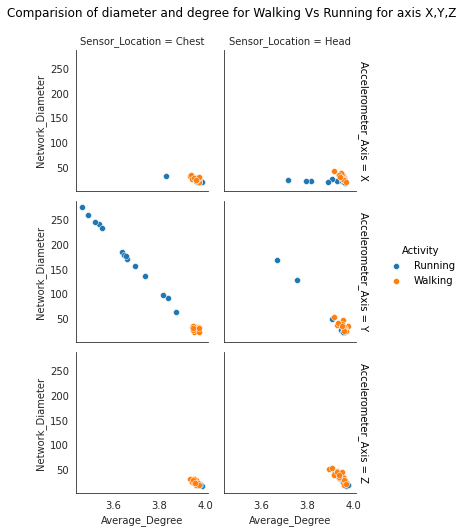

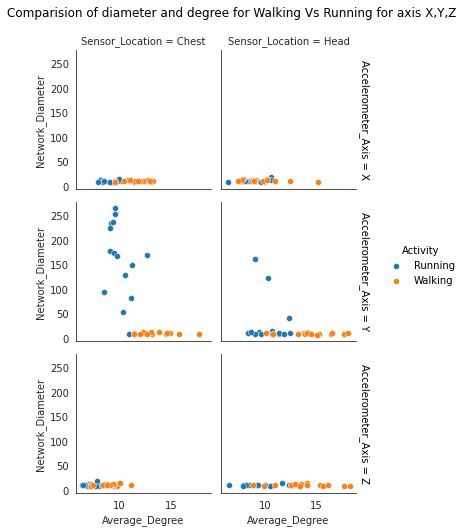

In [6]:
#5. Plotting HVG and NVG graph considering average degree and diameter for walking and running
Act = ['Running', 'Walking'] #plotting the graphs for running and walking activities
act_running_walking = df_activity[df_activity['Activity'].isin(Act)] #filtering the result dataframe with activities
method = ['HVG', 'NVG'] #plotting for NVG and HVG data
for m in method: #looping the data for plotting each method graph
  scatter_df_walking_running = act_running_walking[act_running_walking['Method'] == m] #filtering the dataframe based on method
  with sns.axes_style("white"):
    g = sns.FacetGrid(scatter_df_walking_running, col="Sensor_Location", row="Accelerometer_Axis",hue='Activity', margin_titles=True, height=2.5)
  g.map(sns.scatterplot, "Average_Degree", "Network_Diameter")
  g.add_legend()
  g.fig.subplots_adjust(top = 0.9) # adjust the Figure
  g.fig.suptitle('Comparision of diameter and degree for Walking Vs Running for axis X,Y,Z')
  

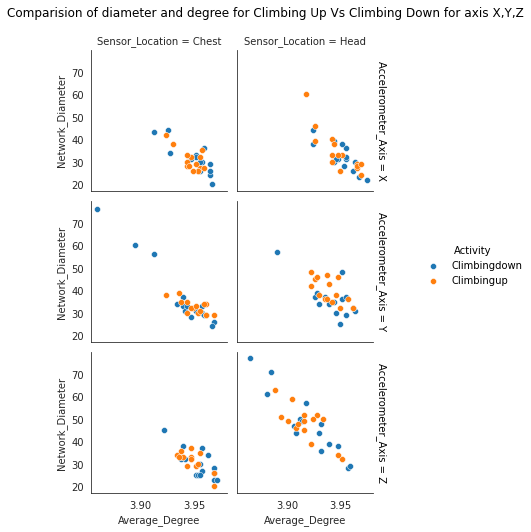

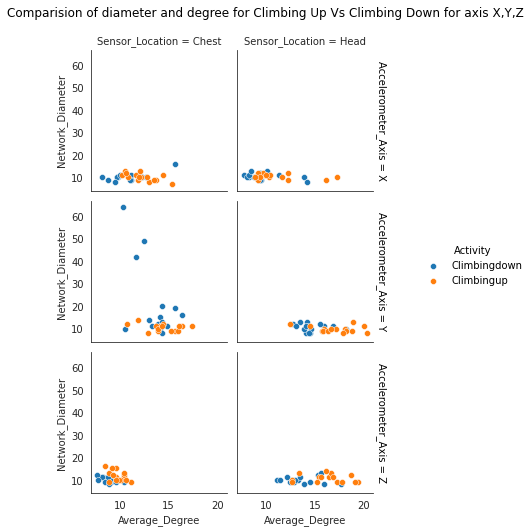

In [7]:
#Plotting HVG and NVG graph considering average degree and diameter for Climbing up and Climbing down
Act = ['Climbingup', 'Climbingdown'] #plotting graphs for climbingup and climbing down
act_climb_up_down = df_activity[df_activity['Activity'].isin(Act)]
method = ['HVG', 'NVG']
for m in method:
  scatter_df_climbing_up_down = act_climb_up_down[act_climb_up_down['Method'] == m]
  with sns.axes_style("white"):
    g = sns.FacetGrid(scatter_df_climbing_up_down, col="Sensor_Location", row="Accelerometer_Axis",hue='Activity', margin_titles=True, height=2.5)
  g.map(sns.scatterplot, "Average_Degree", "Network_Diameter")
  g.add_legend()
  g.fig.subplots_adjust(top = 0.9) # adjust the Figure
  g.fig.suptitle('Comparision of diameter and degree for Climbing Up Vs Climbing Down for axis X,Y,Z')

<h2>Task - 2</h2>

In [8]:
''' This module has essential functions supporting
fast and effective computation of permutation entropy and
its different variations.'''
#resource https://github.com/srk-srinivasan/Permutation-Entropy/blob/master/p_entropy.py
import numpy as np


def s_entropy(freq_list):
    ''' This function computes the shannon entropy of a given frequency distribution.
    USAGE: shannon_entropy(freq_list)
    ARGS: freq_list = Numeric vector representing the frequency distribution
    OUTPUT: A numeric value representing shannon's entropy'''
    freq_list = [element for element in freq_list if element != 0]
    sh_entropy = 0.0
    for freq in freq_list:
        sh_entropy += freq * np.log(freq)
    sh_entropy = -sh_entropy
    return(sh_entropy)

def ordinal_patterns(ts, embdim, embdelay):
    ''' This function computes the ordinal patterns of a time series for a given embedding dimension and embedding delay.
    USAGE: ordinal_patterns(ts, embdim, embdelay)
    ARGS: ts = Numeric vector representing the time series, embdim = embedding dimension (3<=embdim<=7 prefered range), embdelay =  embdding delay
    OUPTUT: A numeric vector representing frequencies of ordinal patterns'''
    m, t = embdim, embdelay
    x = ts if isinstance(ts, np.ndarray) else np.array(ts) 

    tmp = np.zeros((x.shape[0], m))
    for i in range(m):
        tmp[:, i] = np.roll(x, i*t)
    partition = tmp[(t*m-1):, :] 
    permutation = np.argsort(partition)
    idx = _hash(permutation)

    counts = np.zeros(np.math.factorial(m))
    for i in range(counts.shape[0]):
        counts[i] = (idx == i).sum()
    return list(counts[counts != 0].astype(int))

def _hash(x):
    m, n = x.shape
    if n == 1:
        return np.zeros(m)
    return np.sum(np.apply_along_axis(lambda y: y < x[:, 0], 0, x), axis=1) * np.math.factorial(n-1) + _hash(x[:, 1:]) 
    

def p_entropy(op):
    ordinal_pat = op
    max_entropy = np.log(len(ordinal_pat))
    p = np.divide(np.array(ordinal_pat), float(sum(ordinal_pat)))
    return(s_entropy(p)/max_entropy)

def complexity(op):
    ''' This function computes the complexity of a time series defined as: Comp_JS = Q_o * JSdivergence * pe
    Q_o = Normalizing constant
    JSdivergence = Jensen-Shannon divergence
    pe = permutation entopry
    ARGS: ordinal pattern'''
    pe = p_entropy(op)
    constant1 = (0.5+((1 - 0.5)/len(op)))* np.log(0.5+((1 - 0.5)/len(op)))
    constant2 = ((1 - 0.5)/len(op))*np.log((1 - 0.5)/len(op))*(len(op) - 1)
    constant3 = 0.5*np.log(len(op))
    Q_o = -1/(constant1+constant2+constant3)

    temp_op_prob = np.divide(op, sum(op))
    temp_op_prob2 = (0.5*temp_op_prob)+(0.5*(1/len(op)))
    JSdivergence = (s_entropy(temp_op_prob2) - 0.5 * s_entropy(temp_op_prob) - 0.5 * np.log(len(op)))
    Comp_JS = Q_o * JSdivergence * pe
    return(Comp_JS)

def weighted_ordinal_patterns(ts, embdim, embdelay):
    m, t = embdim, embdelay
    x = ts if isinstance(ts, np.ndarray) else np.array(ts) 

    tmp = np.zeros((x.shape[0], m))
    for i in range(m):
        tmp[:, i] = np.roll(x, i*t)
    partition = tmp[(t*m-1):, :] 
    xm = np.mean(partition, axis=1)
    weight = np.mean((partition - xm[:, None])**2, axis=1)
    permutation = np.argsort(partition)
    idx = _hash(permutation)
    counts = np.zeros(np.math.factorial(m))
    for i in range(counts.shape[0]):
        counts[i] = sum(weight[i == idx])

    return list(counts[counts != 0]) 

In [9]:
#1,2 Compute permutation entropy and complexity and result the data in form of dataframe
result = pd.DataFrame(columns=['Subject', 'Accelerometer_Axis', 'Signal_Length', 'Embedded_Dimension', 'Embedded_Delay', 'Permutation_Entropy', 'Complexity', 'Activity', 'Sensor_Location'])
multi_axis = ['attr_x', 'attr_y', 'attr_z']
signal_length = [1028, 2048, 4096]
embedded_dimension = [3,4,5,6]
embedded_delay = [1,2,3]

for a in multi_axis: #iterating the loop for each column
  acc_axis = a.split('_')[1].capitalize()
  for sl in signal_length: #limiting the data based on the signal length
    for e_dim in embedded_dimension: #looping the data for each dimension
      for e_del in embedded_delay: #iterating based on delay
        for file in files_dir_list:
          temp_df = pd.read_csv(file)
          time_series = temp_df[a][1:sl] #selecting the datapoints till the signal length
          ordinal_patt = ordinal_patterns(time_series,e_dim,e_del) #finding the ordinal patterns using this function
          per_entropy = p_entropy(ordinal_patt) #calculating the permutation entropy by passing ordinal pattern as parameter
          comp = complexity(ordinal_patt) #clculating the complexity by passing op as parameter to the complexity function
          sensor_location = file.split('_')[4].split('.')[0].capitalize() #extracting the sensor location from the filename
          subject_no = file.split('_')[1] #extracting the subject number from the selected file
          activity = file.split('_')[3].capitalize() #extracting the activity from the filename
          #after caluculating and extracting all the required data now we can start appending it into dataframe
          result = result.append({'Subject': subject_no, 'Accelerometer_Axis': acc_axis,'Signal_Length': sl, 'Embedded_Dimension': e_dim,'Embedded_Delay': e_del, 'Permutation_Entropy' : per_entropy, 'Complexity' : comp, 'Activity' : activity, 'Sensor_Location' : sensor_location}, ignore_index= True)
result

,Subject,Accelerometer_Axis,Signal_Length,Embedded_Dimension,Embedded_Delay,Permutation_Entropy,Complexity,Activity,Sensor_Location
0,10,X,1028,3,1,0.904162,0.083564,Climbingdown,Chest
1,10,X,1028,3,1,0.940812,0.053492,Climbingdown,Head
2,10,X,1028,3,1,0.894071,0.091413,Climbingup,Chest
3,10,X,1028,3,1,0.916068,0.072558,Climbingup,Head
4,10,X,1028,3,1,0.904729,0.083032,Running,Chest
...,...,...,...,...,...,...,...,...,...
12955,9,Z,4096,6,3,0.808969,0.287347,Climbingup,Head
12956,9,Z,4096,6,3,0.925113,0.151389,Running,Chest
12957,9,Z,4096,6,3,0.877082,0.221731,Running,Head
12958,9,Z,4096,6,3,0.770134,0.303793,Walking,Chest


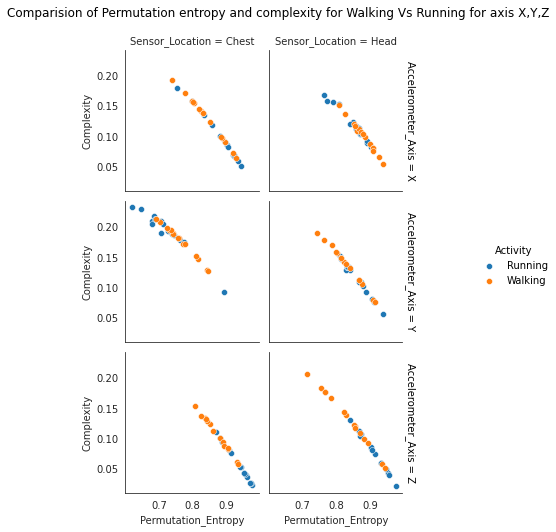

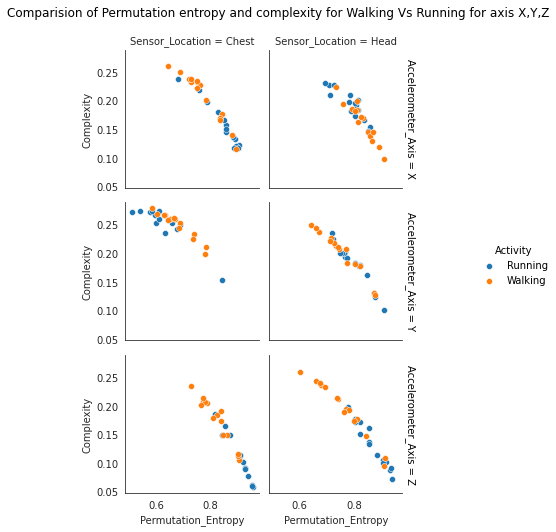

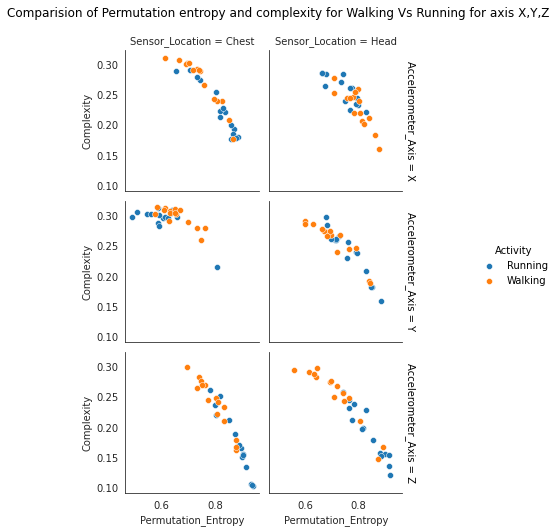

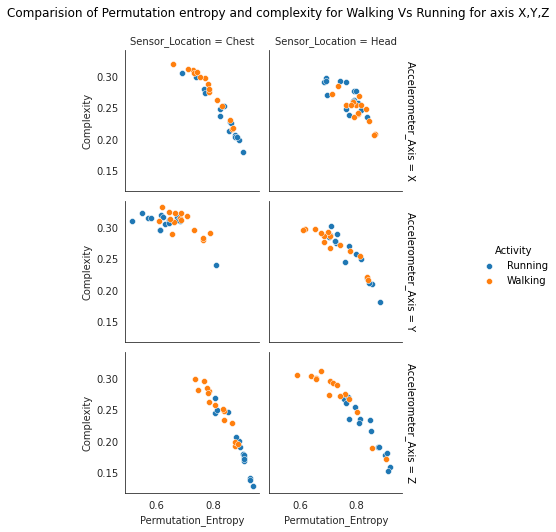

In [10]:
#3. Plotting complexity vs permutation entropy for walking and running
Activities_1 = ['Running', 'Walking'] #selecting only required activities to plot the graph
act_walk_run = result[result['Activity'].isin(Activities_1)] #filtering the data based on activities given in the above list
activity_cleaned = act_walk_run[(act_walk_run.Signal_Length == 4096) & (act_walk_run.Embedded_Delay == 1)] #Now filtering the dataframe based on the signal length and embedded delay
embedded_dims = [3,4,5,6] #plotting graphs based on embedded dimensions

for e in embedded_dims: #plotting the graph for each dimension
  scatter_df_walking_running = activity_cleaned[activity_cleaned['Embedded_Dimension'] == e] #filtering the records based on the selected dimension
  with sns.axes_style("white"):
    g = sns.FacetGrid(scatter_df_walking_running, col="Sensor_Location", row="Accelerometer_Axis",hue='Activity', margin_titles=True, height=2.5)
  g.map(sns.scatterplot, 'Permutation_Entropy', 'Complexity')
  g.add_legend()
  g.fig.subplots_adjust(top = 0.9) # adjust the Figure
  g.fig.suptitle('Comparision of Permutation entropy and complexity for Walking Vs Running for axis X,Y,Z')

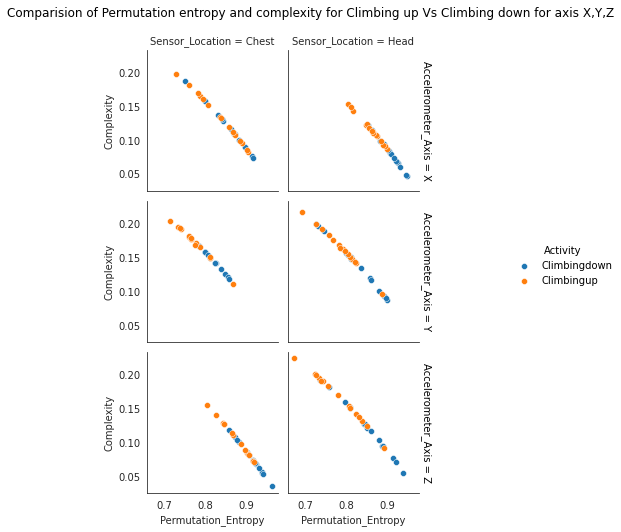

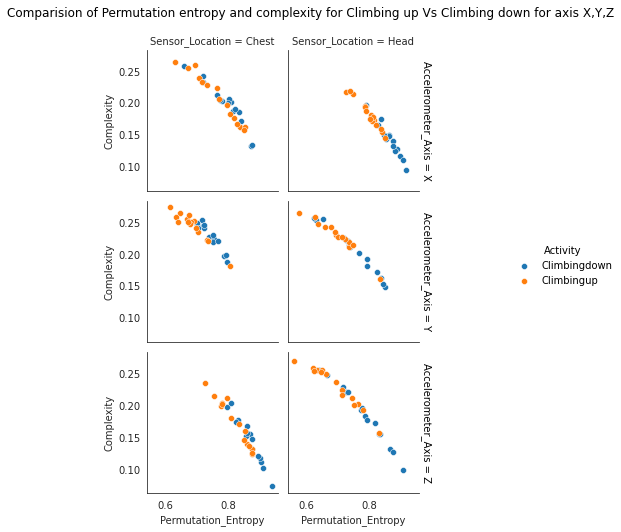

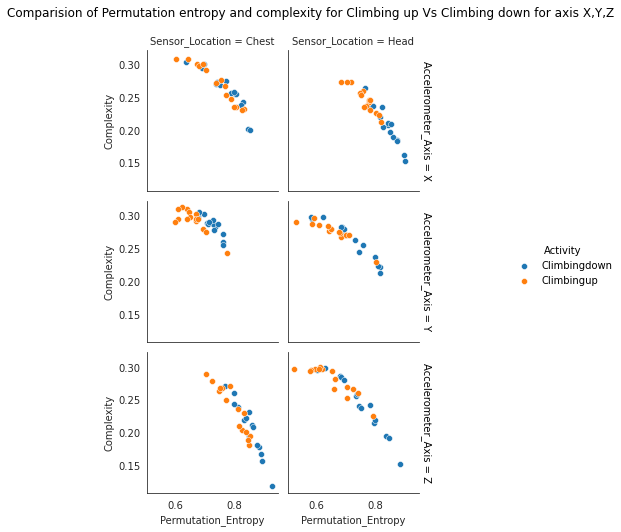

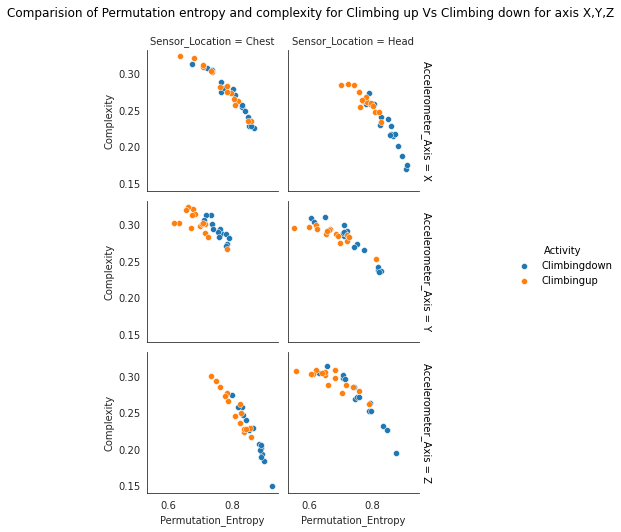

In [11]:
#4. Plotting complexity vs permutation entropy for Climbing up and Climbing down
Activities_2 = ['Climbingup', 'Climbingdown']
act_run = result[result['Activity'].isin(Activities_2)]
act_cleaned = act_run[(act_run.Signal_Length == 4096) & (act_run.Embedded_Delay == 1)]
emb_dim = [3,4,5,6]
#Plotting complexity vs permutation entropy for climbing up and climbing down
for e in emb_dim:
  scatter_df_walk_run = act_cleaned[act_cleaned['Embedded_Dimension'] == e]
  with sns.axes_style("white"):
    g = sns.FacetGrid(scatter_df_walk_run, col="Sensor_Location", row="Accelerometer_Axis",hue='Activity', margin_titles=True, height=2.5)
  g.map(sns.scatterplot, 'Permutation_Entropy', 'Complexity')
  g.add_legend()
  g.fig.subplots_adjust(top = 0.9) # adjust the Figure
  g.fig.suptitle('Comparision of Permutation entropy and complexity for Climbing up Vs Climbing down for axis X,Y,Z')

In [12]:
# !pwd
# %cd /content
# !pwd
!jupyter nbconvert --to html 'FDA_Project_2_grp_16.ipynb'

/content/drive/MyDrive/FDA_Project_2/Datasets_Head_Chest
/content
/content
